In [117]:
import numpy as np
from PIL import Image

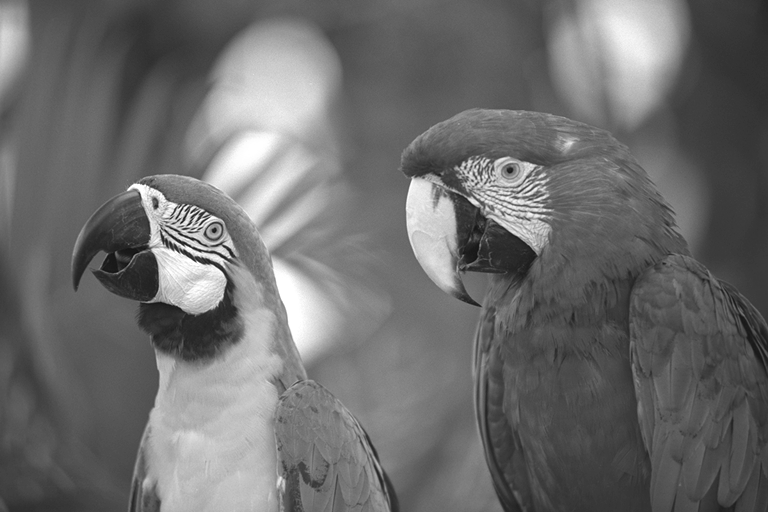

In [118]:
img = Image.open('assets/parrots.png')
display(img)

In [119]:
width, height = img.size

In [120]:
arr = np.array(img).flatten()

### **Explanation**
We will be encoding the ASCII value of the characters<br>
in the plain text into the image. Message will end<br>
with the null character (ASCII value = 0).<br>

In [121]:
plain = 'Hello Bob!'

In [122]:
def char_to_bin(c: str) -> str:
    return bin(ord(c)).removeprefix('0b').zfill(8)

In [123]:
def message_to_bits(m: str) -> str:
    b = ''
    for i in m:
        b += char_to_bin(i)
    b += '00000000'                                                 # null character
    return b

In [124]:
def display_bits(b: str):
    for i in range(0, len(b), 8):
        print(b[i:i+8], end=' ')
    print()

In [125]:
binary = message_to_bits(plain)
display_bits(binary)

01001000 01100101 01101100 01101100 01101111 00100000 01000010 01101111 01100010 00100001 00000000 


In [126]:
def last_bit(n: int) -> int:
    return n % 2

### **Encryption process**

In [127]:
for i in range(len(binary)):
    if binary[i] == '0' and last_bit(arr[i]) == 1:
        arr[i] += 1
    elif binary[i] == '1' and last_bit(arr[i]) == 0:
        arr[i] -= 1

In [128]:
encoded_img = Image.fromarray(arr.reshape(height, width))
encoded_img.save('assets/parrots_encoded.png')

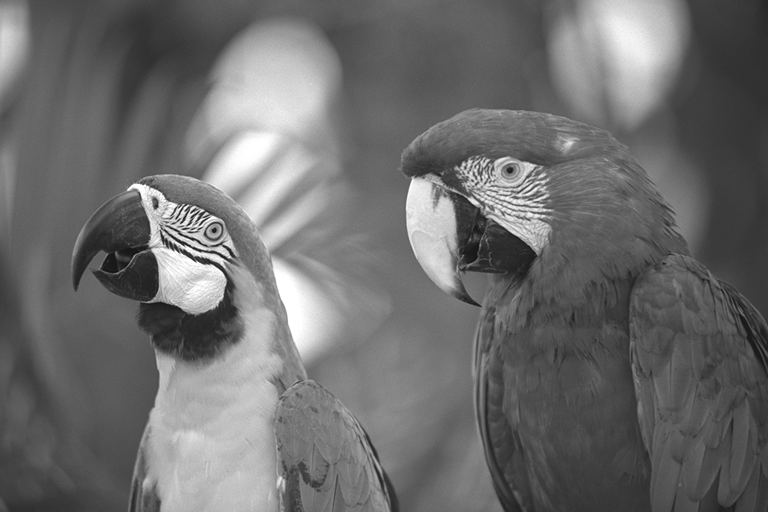

In [129]:
display(encoded_img)

### **Decryption process**

In [130]:
def bin_to_char(b: str) -> str:
    return chr(int(b, 2))

In [131]:
encoded_arr = np.array(Image.open('assets/parrots_encoded.png')).flatten()

In [132]:
message = ''

for i in range(0, len(encoded_arr), 8):
    # byte = ''
    byte = 0
    for j in range(8):
        # byte += str(last_bit(encoded_arr[i+j]))
        byte = byte*2 + last_bit(encoded_arr[i+j])
    # if byte == '00000000':                                          # null character
    if byte == 0:
        break
    # message += bin_to_char(byte)
    message += chr(byte)

In [133]:
print(message)

Hello Bob!
